**STOCK PRICE PREDICTION - MINI PROJECT**

# Stock Price Prediction Project
## Step 1: Data Collection
This notebook collects historical stock price data for Apple (AAPL) using the `yfinance` library.

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
# Download Apple stock data from 2018 to 2023
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(data.head())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.479847  40.489249  39.774869  39.986364  102223600
2018-01-03  40.472782  41.017967  40.409337  40.543281  118071600
2018-01-04  40.660782  40.764179  40.437540  40.545634   89738400
2018-01-05  41.123722  41.210668  40.665487  40.757134   94640000
2018-01-08  40.970974  41.267063  40.872274  40.970974   82271200


In [ ]:
# Save the data to a CSV file
data.to_csv('AAPL_stock_data.csv')

## Step 2: Preprocess the Data
Preprocessing involves cleaning, transforming, and organizing the data so that it can be used effectively in model.


In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
print(data.head())

   1       Date      Close       High        Low       Open     Volume  MA_7  \
0  2 2018-01-02  40.479847  40.489249  39.774869  39.986364  102223600   NaN   
1  3 2018-01-03  40.472782  41.017967  40.409337  40.543281  118071600   NaN   
2  4 2018-01-04  40.660782  40.764179  40.437540  40.545634   89738400   NaN   
3  5 2018-01-05  41.123722  41.210668  40.665487  40.757134   94640000   NaN   
4  6 2018-01-08  40.970974  41.267063  40.872274  40.970974   82271200   NaN   

      Target  
0  40.472782  
1  40.660782  
2  41.123722  
3  40.970974  
4  40.966278  


In [ ]:
data.to_csv('AAPL_stock_data.csv')

In [ ]:
from google.colab import files
files.download('AAPL_stock_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.to_csv('/content/drive/My Drive/AAPL_stock_data.csv')

In [ ]:
# Load the .xlsx file
data = pd.read_excel('AAPL_stock_data.xlsx')

# Display the first few rows of the data
print(data.head())


   1       Date      Close       High        Low       Open     Volume
0  2 2018-01-02  40.479847  40.489249  39.774869  39.986364  102223600
1  3 2018-01-03  40.472782  41.017967  40.409337  40.543281  118071600
2  4 2018-01-04  40.660782  40.764179  40.437540  40.545634   89738400
3  5 2018-01-05  41.123722  41.210668  40.665487  40.757134   94640000
4  6 2018-01-08  40.970974  41.267063  40.872274  40.970974   82271200


In [ ]:
data.to_csv('AAPL_stock_data_fixed.csv')


In [ ]:
print(data.isnull().sum())  # Check for missing values
data = data.dropna()  # Drop rows with missing values


1         0
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [ ]:
# Example: Create a 7-day moving average
data['MA_7'] = data['Close'].rolling(window=7).mean()

In [ ]:
data['Target'] = data['Close'].shift(-1)  # Next day's closing price

In [ ]:
print(data.columns)

Index([1, 'Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA_7', 'Target'], dtype='object')


In [ ]:
# Convert column names to strings
data.columns = data.columns.astype(str)

# Check the column names again
print(data.columns)

Index(['1', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA_7',
       'Target'],
      dtype='object')


In [ ]:
# Create the target variable (e.g., next day's closing price)
data['Target'] = data['Close'].shift(-1)

# Drop the last row (since it won't have a target value)
data = data.dropna()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert DateTime column to string or drop it
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])  # Drop Date column
    # OR
    # data['Date'] = data['Date'].astype(str)  # Convert Date column to string if needed

# Initialize the scaler
scaler = MinMaxScaler()

# Select only numeric columns (excluding target variable)
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('Target')  # Exclude target column

# Scale the features
scaled_features = scaler.fit_transform(data[numeric_columns])

# Convert back to DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=numeric_columns, index=data.index)

# Add the target variable back
scaled_data['Target'] = data['Target'].values

# Display the first few rows
print(scaled_data.head())


           1     Close      High       Low      Open    Volume      MA_7  \
6   0.000000  0.048575  0.042762  0.047716  0.043743  0.154974  0.036085   
7   0.000799  0.050180  0.044690  0.050179  0.046058  0.100878  0.036805   
8   0.001599  0.053114  0.047719  0.052096  0.048632  0.169880  0.037965   
9   0.002398  0.051655  0.051008  0.052906  0.051417  0.212279  0.038719   
10  0.003197  0.056372  0.050782  0.051138  0.048583  0.261558  0.039697   

       Target  
6   41.189518  
7   41.614857  
8   41.403358  
9   42.087181  
10  42.124779  


In [ ]:
# Save the scaled data to a CSV file
scaled_data.to_csv("scaled_stock_data.csv", index=False)
print("Scaled data saved successfully.")


Scaled data saved successfully.


In [ ]:
from sklearn.model_selection import train_test_split

# Define input features (X) and target variable (y)
X = scaled_data.drop(columns=['Target'])  # All columns except target
y = scaled_data['Target']  # Target column

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1001, 7), y_train shape: (1001,)
X_test shape: (251, 7), y_test shape: (251,)


In [ ]:
# Save training set
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)

# Save testing set
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Train and test datasets saved successfully.")


Train and test datasets saved successfully.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [10]:
# Load dataset (Modify according to your data)
df = pd.read_csv("AAPL_stock_data.csv")  # Change file name accordingly
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]  # Select the target variable




In [11]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)


In [12]:
# Convert time-series data into supervised learning format
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [13]:
# Define sequence length
SEQ_LENGTH = 30  # Use past 30 timesteps to predict the next

X, y = create_sequences(df_scaled, SEQ_LENGTH)


In [14]:
# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [20]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))  # Preserve feature count
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [15]:
# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
print("X_train shape:", X_train.shape)  # Should be (samples, timesteps, features)
print("X_test shape:", X_test.shape)


X_train shape: (983, 30, 5)
X_test shape: (246, 30, 5)


In [22]:
# Compile the model
model.compile(optimizer='adam', loss='mse')


In [25]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))  # Preserve feature count
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [26]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])


In [27]:
print("X_train shape:", X_train.shape)  # Should be (samples, timesteps, features)
print("X_test shape:", X_test.shape)


X_train shape: (983, 30, 5)
X_test shape: (246, 30, 5)


In [28]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [29]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 0.0661 - val_loss: 0.0778
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0245 - val_loss: 0.0777
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0248 - val_loss: 0.0779
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0246 - val_loss: 0.0778
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0236 - val_loss: 0.0776
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0225 - val_loss: 0.0776
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0240 - val_loss: 0.0776
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0238 - val_loss: 0.0776
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0230 - val_loss: 0.0778
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0229 - val_loss: 0.0777
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0240 - val_loss: 0.0777
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.

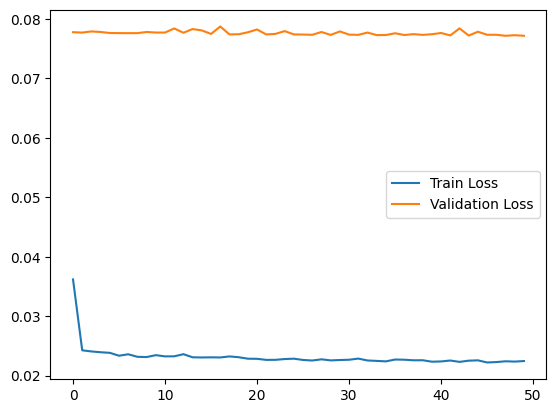

In [30]:
# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [31]:
# Make predictions
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [34]:
scaler_target = MinMaxScaler()
df['Close'] = scaler_target.fit_transform(df[['Close']])  # Scale only Close

# Use this new scaler for inverse transformation
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler_target.inverse_transform(y_pred)


In [35]:
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

df_features = df[['Open', 'High', 'Low', 'Volume']]  # Features
df_target = df[['Close']]  # Target column

df_features_scaled = feature_scaler.fit_transform(df_features)
df_target_scaled = target_scaler.fit_transform(df_target)


In [36]:
y_test_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = target_scaler.inverse_transform(y_pred)


In [37]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


y_test shape: (246, 5)
y_pred shape: (246, 1)


In [38]:
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)


In [47]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)  # Applied to all columns


In [48]:
target_scaler = MinMaxScaler()
df[['Close']] = target_scaler.fit_transform(df[['Close']])  # Scale only "Close"


In [50]:
y_test_actual = target_scaler.inverse_transform(y_test)
y_pred_actual = target_scaler.inverse_transform(y_pred)


In [51]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


y_test shape: (1230, 1)
y_pred shape: (246, 1)


In [53]:
print("Shape of y_test_actual:", y_test_actual.shape)
print("Shape of y_pred_actual:", y_pred_actual.shape)


Shape of y_test_actual: (1230, 1)
Shape of y_pred_actual: (246, 1)


In [54]:
y_test_actual = y_test_actual[-y_pred_actual.shape[0]:]  # Keep only the last matching values


In [55]:
print("New shape of y_test_actual:", y_test_actual.shape)
print("New shape of y_pred_actual:", y_pred_actual.shape)


New shape of y_test_actual: (246, 1)
New shape of y_pred_actual: (246, 1)


In [56]:
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 0.16965189376544293
RMSE: 0.2660641757580628


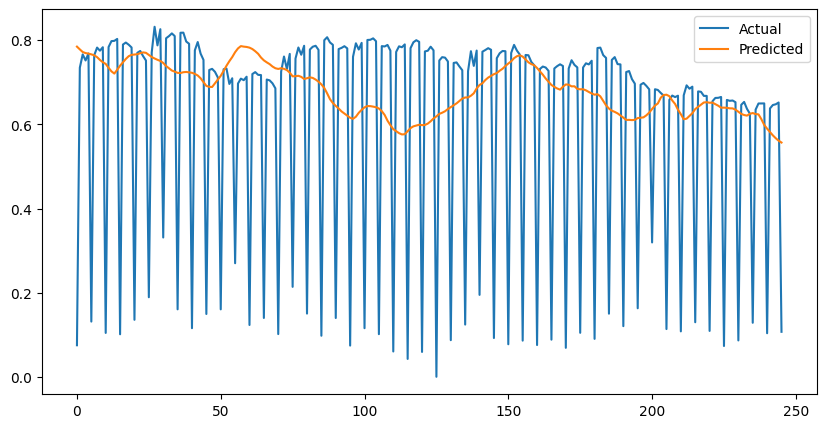

In [57]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label="Actual")
plt.plot(y_pred_actual, label="Predicted")
plt.legend()
plt.show()

In [58]:
error_percentage = (rmse / np.mean(y_test_actual)) * 100
print(f"Percentage Error: {error_percentage:.2f}%")


Percentage Error: 43.14%
